### Problem Statement 

##### To Predict the Range based on the independent features

### Data Overview

Independent Features:
brand	
model	
top_speed_kmh
battery_capacity_kWh	
battery_type	
number_of_cells	
torque_nm	
efficiency_wh_per_km		
acceleration_0_100_s	
towing_capacity_kg	
cargo_volume_l	
seats	
drivetrain	
segment	
length_mm	
width_mm	
height_mm	
car_body_type	
source_url	

Dependant/Target Feature
range_km


In [ ]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

## train test split
from sklearn.model_selection import train_test_split

#model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#save model
import pickle

In [365]:
df = pd.read_csv("electric_vehicles_spec_2025.csv")
df.head(5)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [366]:
#Data Shape
df.shape

(478, 22)

In [367]:
#Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [368]:
#Columns
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [369]:
# Columns to drop
cols_to_drop = ['brand','model','source_url','fast_charge_port',
'cargo_volume_l','number_of_cells','towing_capacity_kg','battery_type']

# Drop columns
df = df.drop(columns=cols_to_drop)
df.head(5)


,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,155,37.8,235.0,156,225,7.0,67.0,4,FWD,B - Compact,3673,1683,1518,Hatchback
1,155,37.8,235.0,149,225,7.0,67.0,4,FWD,B - Compact,3673,1683,1518,Hatchback
2,200,50.8,345.0,158,280,5.9,79.0,5,FWD,JB - Compact,4187,1779,1557,SUV
3,200,50.8,345.0,158,280,6.2,79.0,5,FWD,JB - Compact,4187,1779,1557,SUV
4,150,60.0,310.0,156,315,7.5,78.0,5,FWD,JC - Medium,4680,1865,1700,SUV


In [370]:
df.columns

Index(['top_speed_kmh', 'battery_capacity_kWh', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'seats', 'drivetrain', 'segment',
       'length_mm', 'width_mm', 'height_mm', 'car_body_type'],
      dtype='object')

In [371]:
df.size

6692

In [372]:
df.shape

(478, 14)

In [373]:
df.dtypes

top_speed_kmh                  int64
battery_capacity_kWh         float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
dtype: object

In [374]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,471.000000,478.000000,478.000000,478.000000,477.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,498.012739,162.903766,393.179916,6.882636,125.008386,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,241.461128,34.317532,103.287335,2.730696,58.205012,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,113.000000,109.000000,135.000000,2.200000,29.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,305.000000,143.000000,320.000000,4.800000,80.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,430.000000,155.000000,397.500000,6.600000,113.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,679.000000,177.750000,470.000000,8.200000,150.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,9.000000,5908.000000,2080.000000,1986.000000


In [375]:
df.isna().sum()

top_speed_kmh                0
battery_capacity_kWh         0
torque_nm                    7
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    1
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
dtype: int64

In [376]:
df["torque_nm"].fillna(df["torque_nm"].median(),inplace=True)

In [377]:
df["fast_charging_power_kw_dc"].fillna(df["fast_charging_power_kw_dc"].median(),inplace=True)

In [378]:
#checking for duplicated values
df.duplicated().sum()

12

In [379]:
df = df.drop_duplicates()

In [380]:
df.head(5)

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,155,37.8,235.0,156,225,7.0,67.0,4,FWD,B - Compact,3673,1683,1518,Hatchback
1,155,37.8,235.0,149,225,7.0,67.0,4,FWD,B - Compact,3673,1683,1518,Hatchback
2,200,50.8,345.0,158,280,5.9,79.0,5,FWD,JB - Compact,4187,1779,1557,SUV
3,200,50.8,345.0,158,280,6.2,79.0,5,FWD,JB - Compact,4187,1779,1557,SUV
4,150,60.0,310.0,156,315,7.5,78.0,5,FWD,JC - Medium,4680,1865,1700,SUV


In [381]:
df.isna().sum()

top_speed_kmh                0
battery_capacity_kWh         0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
dtype: int64

In [382]:
df.dtypes

top_speed_kmh                  int64
battery_capacity_kWh         float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
dtype: object

In [383]:
df["drivetrain"].unique()

array(['FWD', 'RWD', 'AWD'], dtype=object)

In [384]:
df["segment"].unique()

array(['B - Compact', 'JB - Compact', 'JC - Medium', 'JE - Executive',
       'JD - Large', 'F - Luxury', 'D - Large', 'E - Executive',
       'C - Medium', 'JF - Luxury', 'N - Passenger Van', 'A - Mini',
       'JA - Mini', 'G - Sports', 'I - Luxury'], dtype=object)

In [385]:
df["car_body_type"].unique()

array(['Hatchback', 'SUV', 'Station/Estate', 'Liftback Sedan', 'Sedan',
       'Small Passenger Van', 'Cabriolet', 'Coupe'], dtype=object)

In [386]:
df = pd.get_dummies(df, columns=['drivetrain'])
df.head(5)

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,seats,segment,length_mm,width_mm,height_mm,car_body_type,drivetrain_AWD,drivetrain_FWD,drivetrain_RWD
0,155,37.8,235.0,156,225,7.0,67.0,4,B - Compact,3673,1683,1518,Hatchback,False,True,False
1,155,37.8,235.0,149,225,7.0,67.0,4,B - Compact,3673,1683,1518,Hatchback,False,True,False
2,200,50.8,345.0,158,280,5.9,79.0,5,JB - Compact,4187,1779,1557,SUV,False,True,False
3,200,50.8,345.0,158,280,6.2,79.0,5,JB - Compact,4187,1779,1557,SUV,False,True,False
4,150,60.0,310.0,156,315,7.5,78.0,5,JC - Medium,4680,1865,1700,SUV,False,True,False


In [387]:
df = pd.get_dummies(df, columns=['segment'])
df.head(5)

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,seats,length_mm,width_mm,...,segment_F - Luxury,segment_G - Sports,segment_I - Luxury,segment_JA - Mini,segment_JB - Compact,segment_JC - Medium,segment_JD - Large,segment_JE - Executive,segment_JF - Luxury,segment_N - Passenger Van
0,155,37.8,235.0,156,225,7.0,67.0,4,3673,1683,...,False,False,False,False,False,False,False,False,False,False
1,155,37.8,235.0,149,225,7.0,67.0,4,3673,1683,...,False,False,False,False,False,False,False,False,False,False
2,200,50.8,345.0,158,280,5.9,79.0,5,4187,1779,...,False,False,False,False,True,False,False,False,False,False
3,200,50.8,345.0,158,280,6.2,79.0,5,4187,1779,...,False,False,False,False,True,False,False,False,False,False
4,150,60.0,310.0,156,315,7.5,78.0,5,4680,1865,...,False,False,False,False,False,True,False,False,False,False


In [388]:
df = pd.get_dummies(df, columns=['car_body_type'])
df.head(5)

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,seats,length_mm,width_mm,...,segment_JF - Luxury,segment_N - Passenger Van,car_body_type_Cabriolet,car_body_type_Coupe,car_body_type_Hatchback,car_body_type_Liftback Sedan,car_body_type_SUV,car_body_type_Sedan,car_body_type_Small Passenger Van,car_body_type_Station/Estate
0,155,37.8,235.0,156,225,7.0,67.0,4,3673,1683,...,False,False,False,False,True,False,False,False,False,False
1,155,37.8,235.0,149,225,7.0,67.0,4,3673,1683,...,False,False,False,False,True,False,False,False,False,False
2,200,50.8,345.0,158,280,5.9,79.0,5,4187,1779,...,False,False,False,False,False,False,True,False,False,False
3,200,50.8,345.0,158,280,6.2,79.0,5,4187,1779,...,False,False,False,False,False,False,True,False,False,False
4,150,60.0,310.0,156,315,7.5,78.0,5,4680,1865,...,False,False,False,False,False,False,True,False,False,False


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 477
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   top_speed_kmh                      466 non-null    int64  
 1   battery_capacity_kWh               466 non-null    float64
 2   torque_nm                          466 non-null    float64
 3   efficiency_wh_per_km               466 non-null    int64  
 4   range_km                           466 non-null    int64  
 5   acceleration_0_100_s               466 non-null    float64
 6   fast_charging_power_kw_dc          466 non-null    float64
 7   seats                              466 non-null    int64  
 8   length_mm                          466 non-null    int64  
 9   width_mm                           466 non-null    int64  
 10  height_mm                          466 non-null    int64  
 11  drivetrain_AWD                     466 non-null    bool   
 12 

In [390]:
# handling of Outliers
def Handling_Of_Outliers(df, col):
    print(f"Handling of Outliers for {col.upper()} ")
    sns.boxplot(df[col], color = "red")

    # checking of Outliers by : IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    Lower_Tail = q1 - 1.5*iqr
    Upper_Tail = q3 + 1.5*iqr

    print("-"*80)
    print(f"\nLower Tail  : {Lower_Tail}")
    print(f"\nUpper Tail : {Upper_Tail}")
    print("-"*80)

    outliers = df[(df[col] < Lower_Tail) | (df[col] > Upper_Tail)]
   
    if outliers.shape[0] == 0:
        print(f"\nNo Outliers are There into {col} column") 
        print("-"*80)
    else: 
        print(f"\nNo of Outliers into {col} = {outliers.shape[0]}")
        print("-"*80)
        print(f"\nOutliers for column : {outliers}")
        print("-"*80)

    # Handling of Outliers  
    df.loc[df[col] < Lower_Tail, col] = Lower_Tail
    df.loc[df[col] > Upper_Tail, col] = Upper_Tail

Handling of Outliers for TOP_SPEED_KMH 
--------------------------------------------------------------------------------

Lower Tail  : 94.0

Upper Tail : 270.0
--------------------------------------------------------------------------------

No of Outliers into top_speed_kmh = 5
--------------------------------------------------------------------------------

Outliers for column :      top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
210            290                  83.0     1350.0                   198   
211            325                  83.0     1350.0                   182   
347            290                  97.0     1340.0                   184   
348            305                  97.0     1340.0                   180   
402            282                  95.0      430.0                   158   

     range_km  acceleration_0_100_s  fast_charging_power_kw_dc  seats  \
210       395                   2.8                      190.0      4   
211   

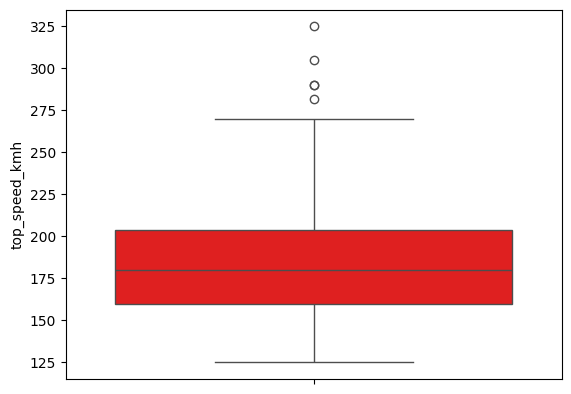

In [391]:
Handling_Of_Outliers(df, "top_speed_kmh")

Handling of Outliers for BATTERY_CAPACITY_KWH 
--------------------------------------------------------------------------------

Lower Tail  : 14.100000000000009

Upper Tail : 136.5
--------------------------------------------------------------------------------

No Outliers are There into battery_capacity_kWh column
--------------------------------------------------------------------------------


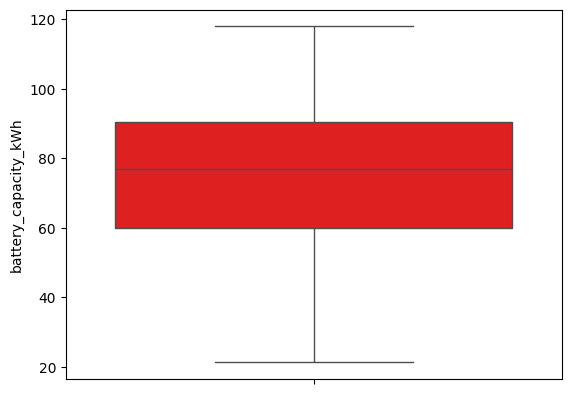

In [392]:
Handling_Of_Outliers(df, "battery_capacity_kWh")

Handling of Outliers for TORQUE_NM 
--------------------------------------------------------------------------------

Lower Tail  : -243.5

Upper Tail : 1232.5
--------------------------------------------------------------------------------

No of Outliers into torque_nm = 4
--------------------------------------------------------------------------------

Outliers for column :      top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
210            270                  83.0     1350.0                   198   
211            270                  83.0     1350.0                   182   
347            270                  97.0     1340.0                   184   
348            270                  97.0     1340.0                   180   

     range_km  acceleration_0_100_s  fast_charging_power_kw_dc  seats  \
210       395                   2.8                      190.0      4   
211       420                   2.7                      217.0      4   
347       475  

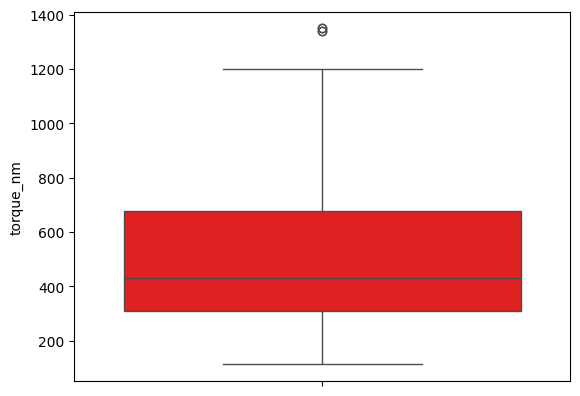

In [393]:
Handling_Of_Outliers(df, "torque_nm")

Handling of Outliers for EFFICIENCY_WH_PER_KM 
--------------------------------------------------------------------------------

Lower Tail  : 89.5

Upper Tail : 229.5
--------------------------------------------------------------------------------

No of Outliers into efficiency_wh_per_km = 14
--------------------------------------------------------------------------------

Outliers for column :      top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
129            130                  64.0      415.0                   370   
130            130                  64.0      415.0                   370   
131            150                  64.0      415.0                   370   
132            150                  64.0      415.0                   370   
189            260                 109.0      985.0                   266   
236            240                  90.6     1000.0                   242   
250            160                  60.0      365.0          

C:\Users\DANISH\AppData\Local\Temp\ipykernel_21524\1882629926.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '89.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < Lower_Tail, col] = Lower_Tail


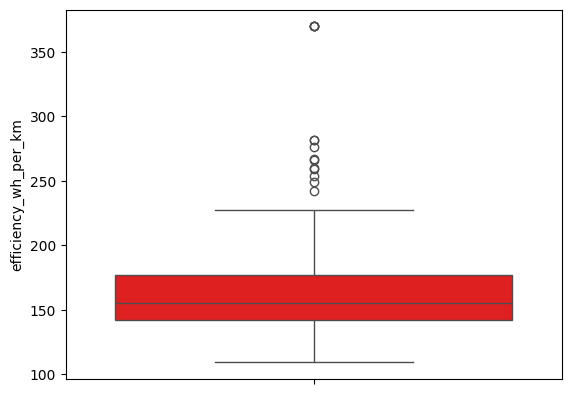

In [394]:
Handling_Of_Outliers(df, "efficiency_wh_per_km")

Handling of Outliers for ACCELERATION_0_100_S 
--------------------------------------------------------------------------------

Lower Tail  : -0.2999999999999998

Upper Tail : 13.299999999999999
--------------------------------------------------------------------------------

No of Outliers into acceleration_0_100_s = 16
--------------------------------------------------------------------------------

Outliers for column :      top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
89             130                  46.3      220.0                 217.0   
90             130                  68.0      220.0                 202.0   
91             130                  46.3      220.0                 219.0   
92             130                  68.0      220.0                 204.0   
98             125                  25.0      125.0                 109.0   
99             125                  25.0      113.0                 114.0   
248            132               

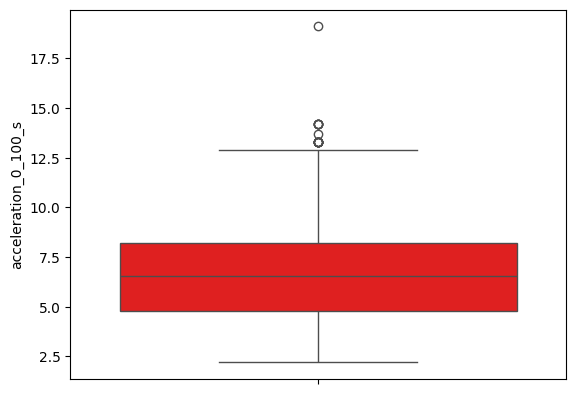

In [395]:
Handling_Of_Outliers(df, "acceleration_0_100_s")

In [396]:
df.columns

Index(['top_speed_kmh', 'battery_capacity_kWh', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'seats', 'length_mm', 'width_mm',
       'height_mm', 'drivetrain_AWD', 'drivetrain_FWD', 'drivetrain_RWD',
       'segment_A - Mini', 'segment_B - Compact', 'segment_C - Medium',
       'segment_D - Large', 'segment_E - Executive', 'segment_F - Luxury',
       'segment_G - Sports', 'segment_I - Luxury', 'segment_JA - Mini',
       'segment_JB - Compact', 'segment_JC - Medium', 'segment_JD - Large',
       'segment_JE - Executive', 'segment_JF - Luxury',
       'segment_N - Passenger Van', 'car_body_type_Cabriolet',
       'car_body_type_Coupe', 'car_body_type_Hatchback',
       'car_body_type_Liftback Sedan', 'car_body_type_SUV',
       'car_body_type_Sedan', 'car_body_type_Small Passenger Van',
       'car_body_type_Station/Estate'],
      dtype='object')

Handling of Outliers for FAST_CHARGING_POWER_KW_DC 
--------------------------------------------------------------------------------

Lower Tail  : -25.0

Upper Tail : 255.0
--------------------------------------------------------------------------------

No of Outliers into fast_charging_power_kw_dc = 26
--------------------------------------------------------------------------------

Outliers for column :      top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
34             250                  97.0      865.0                 184.0   
35             250                  97.0     1027.0                 182.0   
36             245                  97.0      740.0                 172.0   
37             245                  97.0      625.0                 169.0   
188            250                 109.0      710.0                 204.0   
189            260                 109.0      985.0                 229.5   
190            250                 109.0      710.

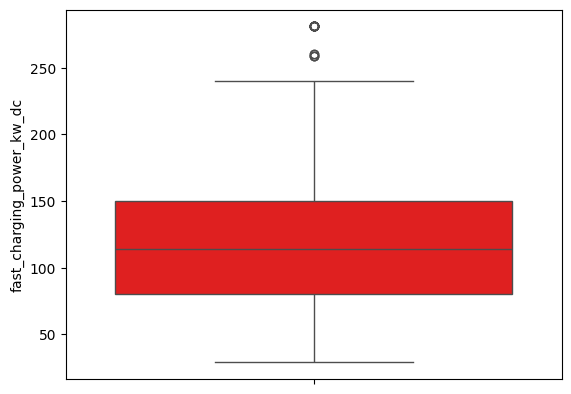

In [397]:
Handling_Of_Outliers(df, "fast_charging_power_kw_dc")

Handling of Outliers for SEATS 
--------------------------------------------------------------------------------

Lower Tail  : 5.0

Upper Tail : 5.0
--------------------------------------------------------------------------------

No of Outliers into seats = 90
--------------------------------------------------------------------------------

Outliers for column :      top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
0              155                  37.8      235.0                 156.0   
1              155                  37.8      235.0                 149.0   
34             250                  97.0      865.0                 184.0   
35             250                  97.0     1027.0                 182.0   
36             245                  97.0      740.0                 172.0   
..             ...                   ...        ...                   ...   
420            160                  79.0      560.0                 187.0   
421            14

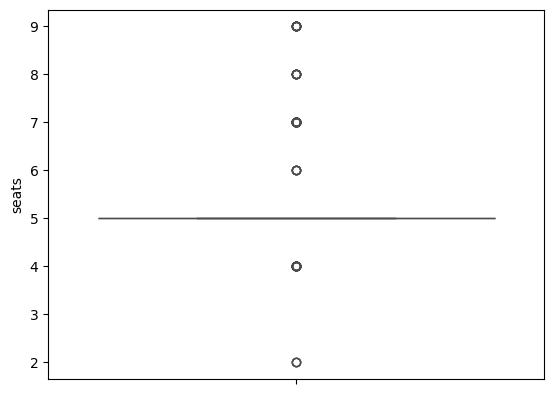

In [398]:
Handling_Of_Outliers(df, "seats")

Handling of Outliers for WIDTH_MM 
--------------------------------------------------------------------------------

Lower Tail  : 1714.0

Upper Tail : 2074.0
--------------------------------------------------------------------------------

No of Outliers into width_mm = 13
--------------------------------------------------------------------------------

Outliers for column :      top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
0              155                  37.8      235.0                 156.0   
1              155                  37.8      235.0                 149.0   
98             125                  25.0      125.0                 109.0   
99             125                  25.0      113.0                 114.0   
103            135                  21.3      220.0                 112.0   
104            150                  37.3      220.0                 122.0   
105            135                  21.3      220.0                 112.0   
106  

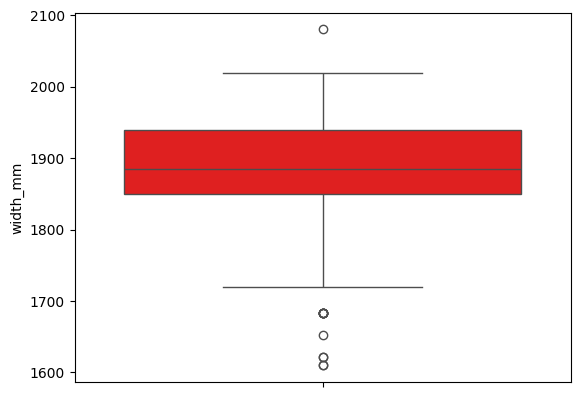

In [399]:
Handling_Of_Outliers(df, "width_mm")

Handling of Outliers for HEIGHT_MM 
--------------------------------------------------------------------------------

Lower Tail  : 1295.0

Upper Tail : 1879.0
--------------------------------------------------------------------------------

No of Outliers into height_mm = 29
--------------------------------------------------------------------------------

Outliers for column :      top_speed_kmh  battery_capacity_kWh  torque_nm  efficiency_wh_per_km  \
89             130                  46.3      220.0                 217.0   
90             130                  68.0      220.0                 202.0   
91             130                  46.3      220.0                 219.0   
92             130                  68.0      220.0                 204.0   
129            130                  64.0      415.0                 229.5   
130            130                  64.0      415.0                 229.5   
131            150                  64.0      415.0                 229.5   
132

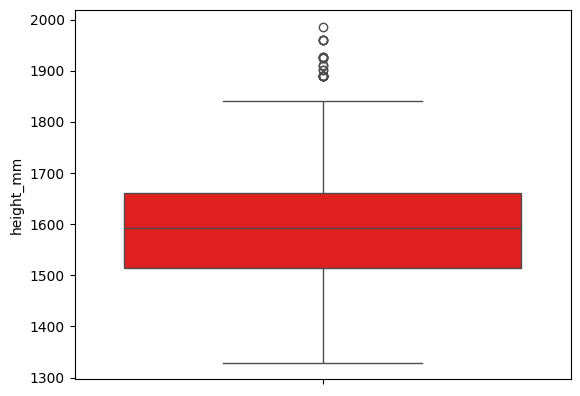

In [400]:
Handling_Of_Outliers(df, "height_mm")

### Visualization

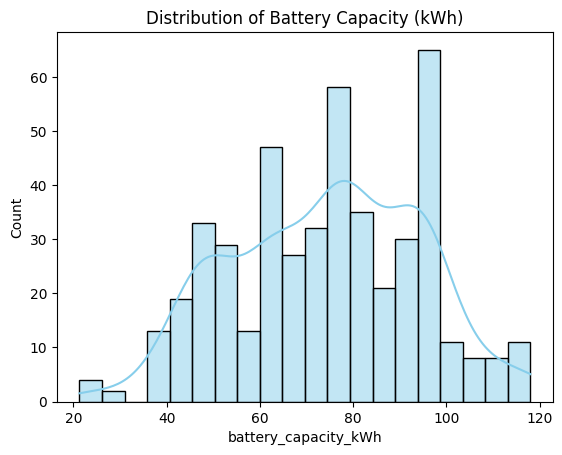

In [401]:
#univariate Analysis
sns.histplot(df['battery_capacity_kWh'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Battery Capacity (kWh)")
plt.xlabel("battery_capacity_kWh")
plt.ylabel("Count")
plt.show()

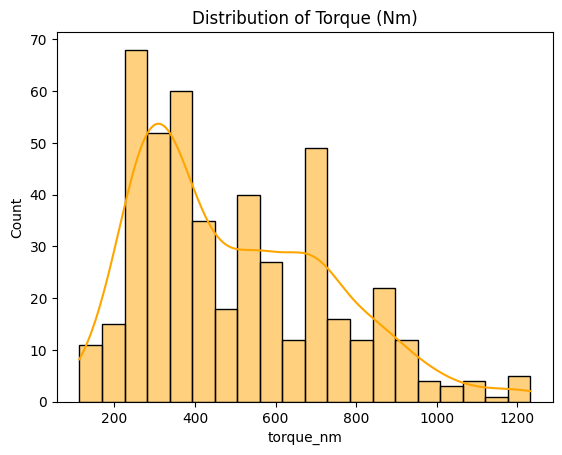

In [402]:
#univariate Analysis
sns.histplot(df['torque_nm'], bins=20, kde=True, color='orange')
plt.title("Distribution of Torque (Nm)")
plt.xlabel("torque_nm")
plt.ylabel("Count")
plt.show()

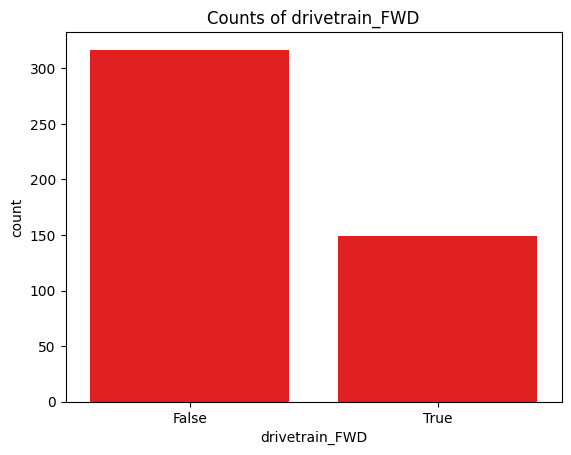

In [403]:
sns.countplot(x=df['drivetrain_FWD'],color="Red")
plt.title("Counts of drivetrain_FWD")
plt.show()

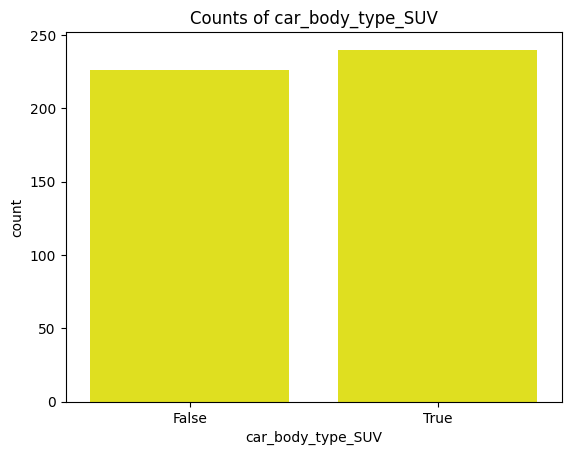

In [404]:
sns.countplot(x=df['car_body_type_SUV'],color="Yellow")
plt.title("Counts of car_body_type_SUV")
plt.show()

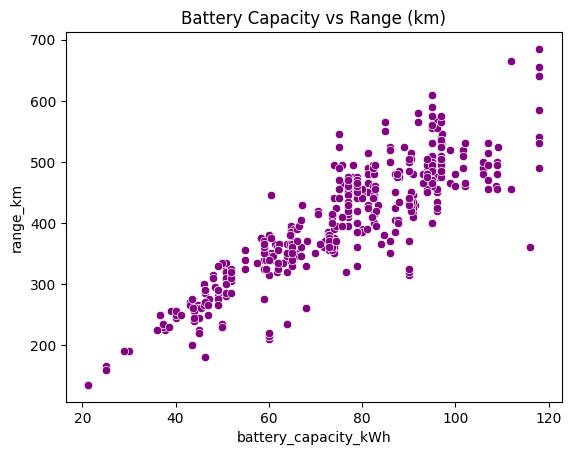

In [405]:
#Bivariate Analysis
sns.scatterplot(x=df['battery_capacity_kWh'], y=df['range_km'], color='purple')
plt.title("Battery Capacity vs Range (km)")
plt.xlabel("battery_capacity_kWh")
plt.ylabel("range_km")
plt.show()

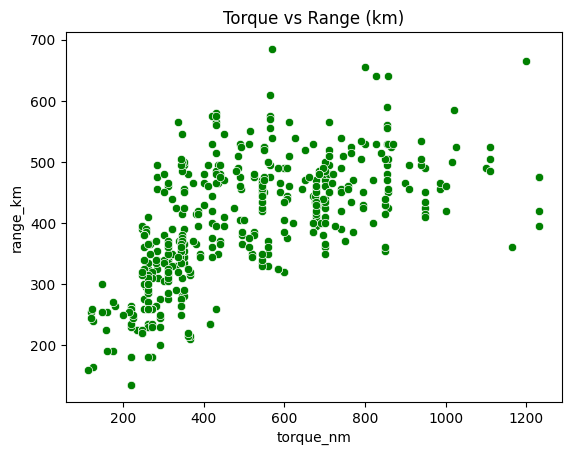

In [406]:
#Bivariate Analysis
sns.scatterplot(x=df['torque_nm'], y=df['range_km'], color='green')
plt.title("Torque vs Range (km)")
plt.xlabel("torque_nm")
plt.ylabel("range_km")
plt.show()

### Train-Test Split

In [408]:
x = df.drop(columns=['range_km'])
y = df['range_km']

In [409]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

### Linear Regression 

In [410]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [411]:
lin_model = lin_reg.fit(xtrain,ytrain)
lin_model

LinearRegression()

In [412]:
ytrain_pred = lin_model.predict(xtrain)
ytest_pred = lin_model.predict(xtest)

In [413]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 368.46597198958455
Mean Absolute Error(MAE) : 15.042512628904323
Root Mean Squared Error(RMSE) : 19.195467485570248
R2 Score : 0.9645979645359906


In [414]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 344.8719841611933
Mean Absolute Error(MAE) : 14.533473063452869
Root Mean Squared Error(RMSE) : 18.57072923073279
R2 Score : 0.9652428396195404


### KNN Algorithm

In [415]:
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [416]:
knn_model = knn.fit(xtrain,ytrain)
knn_model

KNeighborsRegressor()

In [417]:
ytrain_pred = knn_model.predict(xtrain)
ytest_pred = knn_model.predict(xtest)

In [418]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 1598.2043010752689
Mean Absolute Error(MAE) : 31.27956989247312
Root Mean Squared Error(RMSE) : 39.97754746198507
R2 Score : 0.8464452903482809


In [419]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 2928.840425531915
Mean Absolute Error(MAE) : 44.329787234042556
Root Mean Squared Error(RMSE) : 54.11876223207544
R2 Score : 0.7048232936445022


### KNN Algorithm with hyperparameter

In [420]:
knn_hyperparameters = {'n_neighbors': [3, 5, 7, 9, 11], 
                   'weights': ['uniform','distance'], 
                   'metric': ['euclidean','manhattan','minkowski']}

In [421]:
knn_rscv = RandomizedSearchCV(knn_model,knn_hyperparameters,cv=5)
knn_rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']})

In [422]:
knn_rscv.best_estimator_

KNeighborsRegressor(metric='manhattan', weights='distance')

In [423]:
knn_hyp = KNeighborsRegressor(metric='manhattan', weights='distance')
knn_model_hyp = knn_hyp.fit(xtrain,ytrain)
knn_model_hyp

KNeighborsRegressor(metric='manhattan', weights='distance')

In [424]:
ytrain_pred = knn_model_hyp.predict(xtrain)
ytest_pred = knn_model_hyp.predict(xtest)

In [425]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 0.20161290322580644
Mean Absolute Error(MAE) : 0.053763440860215055
Root Mean Squared Error(RMSE) : 0.44901325506693723
R2 Score : 0.9999806291280807


In [426]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 1925.5240858098737
Mean Absolute Error(MAE) : 34.10474602329615
Root Mean Squared Error(RMSE) : 43.88079404260905
R2 Score : 0.8059403125199913


### AdaBoost Algorithm

In [427]:
ada = AdaBoostRegressor()
ada

AdaBoostRegressor()

In [428]:
ada_model = ada.fit(xtrain,ytrain)
ada_model

AdaBoostRegressor()

In [429]:
ytrain_pred = ada_model.predict(xtrain)
ytest_pred = ada_model.predict(xtest)

In [430]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 593.4918029546589
Mean Absolute Error(MAE) : 20.129260798077148
Root Mean Squared Error(RMSE) : 24.361687194335676
R2 Score : 0.9429775896472913


In [431]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 760.9821933650828
Mean Absolute Error(MAE) : 22.115381842396026
Root Mean Squared Error(RMSE) : 27.585905701373715
R2 Score : 0.9233060922423273


### AdaBoost with Hyperparameter

In [432]:
ada_hyperparameters = {'n_estimators': [100, 200, 300, 500], 
                        'learning_rate': [0.01, 0.05, 0.1]}

In [433]:
ada_rscv = RandomizedSearchCV(ada_model,ada_hyperparameters,cv=5)
ada_rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'n_estimators': [100, 200, 300, 500]})

In [434]:
ada_rscv.best_estimator_

AdaBoostRegressor(learning_rate=0.1, n_estimators=500)

In [435]:
ada_hyp = AdaBoostRegressor(learning_rate=0.1, n_estimators=500)
ada_model_hyp = ada_hyp.fit(xtrain,ytrain)
ada_model_hyp

AdaBoostRegressor(learning_rate=0.1, n_estimators=500)

In [436]:
ytrain_pred = ada_model_hyp.predict(xtrain)
ytest_pred = ada_model_hyp.predict(xtest)

In [437]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 567.5375860659874
Mean Absolute Error(MAE) : 19.46080488030803
Root Mean Squared Error(RMSE) : 23.823047371526325
R2 Score : 0.9454712584704176


In [438]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 793.2805896554332
Mean Absolute Error(MAE) : 21.798619502834764
Root Mean Squared Error(RMSE) : 28.165237255443692
R2 Score : 0.9200509697868869


### Decision Tree 

In [439]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [440]:
dt_model = dt.fit(xtrain,ytrain)
dt_model

DecisionTreeRegressor()

In [441]:
ytrain_pred = dt_model.predict(xtrain)
ytest_pred = dt_model.predict(xtest)

In [442]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 0.20161290322580644
Mean Absolute Error(MAE) : 0.053763440860215055
Root Mean Squared Error(RMSE) : 0.44901325506693723
R2 Score : 0.9999806291280807


In [443]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 594.6808510638298
Mean Absolute Error(MAE) : 16.27659574468085
Root Mean Squared Error(RMSE) : 24.386079042433817
R2 Score : 0.9400664053188128


### Decision Tree with Hyperparameter

In [444]:
dt_hyperparameters = {'criterion':["squared_error", "absolute_error"], 
                       'max_depth': [None, 5, 10, 20, 30], 
                       'min_samples_split': [2, 5, 10, 20], 
                       'min_samples_leaf': [1, 2, 5, 10], 
                       'max_features': [None, 'sqrt', 'log2']}

In [445]:
dt_rscv = RandomizedSearchCV(dt_model,dt_hyperparameters,cv=5)
dt_model_hyp = dt_rscv.fit(xtrain,ytrain)
dt_model_hyp

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20]})

In [446]:
dt_model_hyp.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [447]:
dt_hyp = DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5)
dt_model_hyp = dt_hyp.fit(xtrain,ytrain)
dt_model_hyp

DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5)

In [448]:
ytrain_pred = dt_model_hyp.predict(xtrain)
ytest_pred = dt_model_hyp.predict(xtest)

In [449]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 102.44735663082439
Mean Absolute Error(MAE) : 6.467293906810037
Root Mean Squared Error(RMSE) : 10.12162816106304
R2 Score : 0.9901569066661575


In [450]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 536.787086288416
Mean Absolute Error(MAE) : 16.73758865248227
Root Mean Squared Error(RMSE) : 23.168666044647804
R2 Score : 0.9459011003933399


### RandomForest Algorithm

In [451]:
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [452]:
rf_model = rf.fit(xtrain,ytrain)
rf_model

RandomForestRegressor()

In [453]:
ytrain_pred = rf_model.predict(xtrain)
ytest_pred = rf_model.predict(xtest)

In [454]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 64.24687517734468
Mean Absolute Error(MAE) : 5.575849014336916
Root Mean Squared Error(RMSE) : 8.015414847488849
R2 Score : 0.9938271907682579


In [455]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 351.8248071734635
Mean Absolute Error(MAE) : 14.278998226950355
Root Mean Squared Error(RMSE) : 18.75699355369787
R2 Score : 0.9645421147255708


### RandomForest Algorithm with Hyperparameter

In [456]:
rf_hyperparameters = {
 'n_estimators': [100, 200, 500],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5],
 'max_features': ['sqrt', 'log2'],
 'criterion': ['squared_error', 'absolute_error']
}

In [457]:
rf_rscv = RandomizedSearchCV(rf_model,rf_hyperparameters,cv=5)
rf_rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]})

In [458]:
rf_rscv.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [459]:
rf_hyp = RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', n_estimators=500)
rf_model_hyp = rf_hyp.fit(xtrain,ytrain)
rf_model_hyp

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', n_estimators=500)

In [460]:
ytrain_pred = rf_model_hyp.predict(xtrain)
ytest_pred = rf_model_hyp.predict(xtest)

In [461]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 113.3372380376344
Mean Absolute Error(MAE) : 7.792338709677419
Root Mean Squared Error(RMSE) : 10.645996338419172
R2 Score : 0.9891106120363412


In [462]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 608.4612989361702
Mean Absolute Error(MAE) : 19.808191489361704
Root Mean Squared Error(RMSE) : 24.667008309403275
R2 Score : 0.9386775733498187


### GradientBoosting Algorithm

In [463]:
gb = GradientBoostingRegressor()
gb

GradientBoostingRegressor()

In [464]:
gb_model = gb.fit(xtrain,ytrain)
gb_model

GradientBoostingRegressor()

In [465]:
ytrain_pred = gb_model.predict(xtrain)
ytest_pred = gb_model.predict(xtest)

In [466]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 73.21373459685825
Mean Absolute Error(MAE) : 6.698906736368769
Root Mean Squared Error(RMSE) : 8.556502474542869
R2 Score : 0.9929656591770059


In [467]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 235.7150385656332
Mean Absolute Error(MAE) : 11.852415033990164
Root Mean Squared Error(RMSE) : 15.3530139896254
R2 Score : 0.976243981025485


### GradientBoosting Algorithm with hyperparameter

In [468]:
gb_hyperparameters = {'n_estimators': [100, 200, 300, 500], 
                   'learning_rate': [0.01, 0.05, 0.1, 0.2], 
                   'max_depth': [2, 3, 4, 5], 
                   'subsample': [0.6, 0.8, 1.0]}

In [469]:
gb_rscv = RandomizedSearchCV(gb_model,gb_hyperparameters,cv=5)
gb_rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]})

In [470]:
gb_rscv.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, n_estimators=300, subsample=0.8)

In [471]:
gb_hyp = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          subsample=0.8)
gb_model_hyp = gb_hyp.fit(xtrain,ytrain)
gb_model_hyp

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          subsample=0.8)

In [472]:
ytrain_pred = gb_model_hyp.predict(xtrain)
ytest_pred = gb_model_hyp.predict(xtest)

In [473]:
# Evaluation for Training Data
mse = mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytrain,ytrain_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 10.886486944369706
Mean Absolute Error(MAE) : 2.678536056139562
Root Mean Squared Error(RMSE) : 3.299467675909207
R2 Score : 0.9989540315085217


In [474]:
#Evaluation for Testing Data
mse = mean_squared_error(ytest,ytest_pred)
print(f"Mean Squared Error(MSE) : {mse}")

mae = mean_absolute_error(ytest,ytest_pred)
print(f"Mean Absolute Error(MAE) : {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse}")

r2score = r2_score(ytest,ytest_pred)
print(f"R2 Score : {r2score}")

Mean Squared Error(MSE) : 202.69764800869277
Mean Absolute Error(MAE) : 9.941946444732414
Root Mean Squared Error(RMSE) : 14.237192420161103
R2 Score : 0.979571565728322


In [475]:
def model_performance(model, xtrain, xtest, ytrain, ytest, model_name):
    
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)
    
    data = {
        "Model": model_name,
        
        "Train_mse": mean_squared_error(ytrain, ytrain_pred),
        "Train_mae": mean_absolute_error(ytrain, ytrain_pred),
        "Train_rsme": np.sqrt(mean_squared_error(ytrain, ytrain_pred)),
        "Train_R2": r2_score(ytrain, ytrain_pred),
        
        "Test_mse": mean_squared_error(ytest, ytest_pred),
        "Test_mae": mean_absolute_error(ytest, ytest_pred),
        "Test_rmse": np.sqrt(mean_squared_error(ytest, ytest_pred)),
        "Test_R2": r2_score(ytest, ytest_pred),
    }
    
    return pd.DataFrame([data])

In [476]:
results = pd.concat([
    model_performance(knn_model, xtrain, xtest, ytrain, ytest, "KNN"),
    model_performance(knn_model_hyp, xtrain, xtest, ytrain, ytest, "KNN (Hyp)"),
    model_performance(ada_model, xtrain, xtest, ytrain, ytest, "AdaBoost"),
    model_performance(ada_model_hyp, xtrain, xtest, ytrain, ytest, "AdaBoost (Hyp)"),
    model_performance(dt_model, xtrain, xtest, ytrain, ytest, "Decision Tree"),
    model_performance(dt_model_hyp, xtrain, xtest, ytrain, ytest, "Decision Tree (Hyp)"),
    model_performance(rf_model, xtrain, xtest, ytrain, ytest, "Random Forest"),
    model_performance(rf_model_hyp, xtrain, xtest, ytrain, ytest, "Random Forest (Hyp)"),
    model_performance(gb_model, xtrain, xtest, ytrain, ytest, "Gradient Boosting"),
    model_performance(gb_model_hyp, xtrain, xtest, ytrain, ytest, "Gradient Boosting (Hyp)")
], ignore_index=True)


In [477]:
results

,Model,Train_mse,Train_mae,Train_rsme,Train_R2,Test_mse,Test_mae,Test_rmse,Test_R2
0,KNN,1598.204301,31.279570,39.977547,0.846445,2928.840426,44.329787,54.118762,0.704823
1,KNN (Hyp),0.201613,0.053763,0.449013,0.999981,1925.524086,34.104746,43.880794,0.805940
2,AdaBoost,593.491803,20.129261,24.361687,0.942978,760.982193,22.115382,27.585906,0.923306
3,AdaBoost (Hyp),567.537586,19.460805,23.823047,0.945471,793.280590,21.798620,28.165237,0.920051
4,Decision Tree,0.201613,0.053763,0.449013,0.999981,594.680851,16.276596,24.386079,0.940066
5,Decision Tree (Hyp),102.447357,6.467294,10.121628,0.990157,536.787086,16.737589,23.168666,0.945901
6,Random Forest,64.246875,5.575849,8.015415,0.993827,351.824807,14.278998,18.756994,0.964542
7,Random Forest (Hyp),113.337238,7.792339,10.645996,0.989111,608.461299,19.808191,24.667008,0.938678
8,Gradient Boosting,73.213735,6.698907,8.556502,0.992966,235.715039,11.852415,15.353014,0.976244
9,Gradient Boosting (Hyp),10.886487,2.678536,3.299468,0.998954,202.697648,9.941946,14.237192,0.979572


In [478]:
model = 'gradient_boosting_model.pkl'
with open(model, 'wb') as file:
    pickle.dump(gb_model_hyp, file)

In [479]:
with open('gradient_boosting_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [480]:
new_data = pd.DataFrame([{
    'top_speed_kmh': 160,
    'battery_capacity_kWh': 55,
    'torque_nm': 250,
    'efficiency_wh_per_km': 160,
    'acceleration_0_100_s': 8.5,
    'fast_charging_power_kw_dc': 100,
    'seats': 5,
    'length_mm': 4300,
    'width_mm': 1800,
    'height_mm': 1550,
    'drivetrain_AWD': 0,
    'drivetrain_FWD': 1,
    'drivetrain_RWD': 0,
    'segment_A - Mini': 0,
    'segment_B - Compact': 1,
    'segment_C - Medium': 0,
    'segment_D - Large': 0,
    'segment_E - Executive': 0,
    'segment_F - Luxury': 0,
    'segment_G - Sports': 0,
    'segment_I - Luxury': 0,
    'segment_JA - Mini': 0,
    'segment_JB - Compact': 0,
    'segment_JC - Medium': 0,
    'segment_JD - Large': 0,
    'segment_JE - Executive': 0,
    'segment_JF - Luxury': 0,
    'segment_N - Passenger Van': 0,
    'car_body_type_Cabriolet': 0,
    'car_body_type_Coupe': 0,
    'car_body_type_Hatchback': 1,
    'car_body_type_Liftback Sedan': 0,
    'car_body_type_SUV': 0,
    'car_body_type_Sedan': 0,
    'car_body_type_Small Passenger Van': 0,
    'car_body_type_Station/Estate': 0
}])

In [481]:
predicted_range = loaded_model.predict(new_data)
predicted_range

array([334.90661229])

In [482]:
#random input
input_data = xtrain.head(1)
input_data

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,acceleration_0_100_s,fast_charging_power_kw_dc,seats,length_mm,width_mm,height_mm,...,segment_JF - Luxury,segment_N - Passenger Van,car_body_type_Cabriolet,car_body_type_Coupe,car_body_type_Hatchback,car_body_type_Liftback Sedan,car_body_type_SUV,car_body_type_Sedan,car_body_type_Small Passenger Van,car_body_type_Station/Estate
420,160,79.0,560.0,187.0,7.6,135.0,5,4712,1985,1879,...,False,True,False,False,False,False,False,False,True,False


In [483]:
prediction = loaded_model.predict(input_data)
print("Predicted Value:", prediction)

Predicted Value: [359.68296111]
